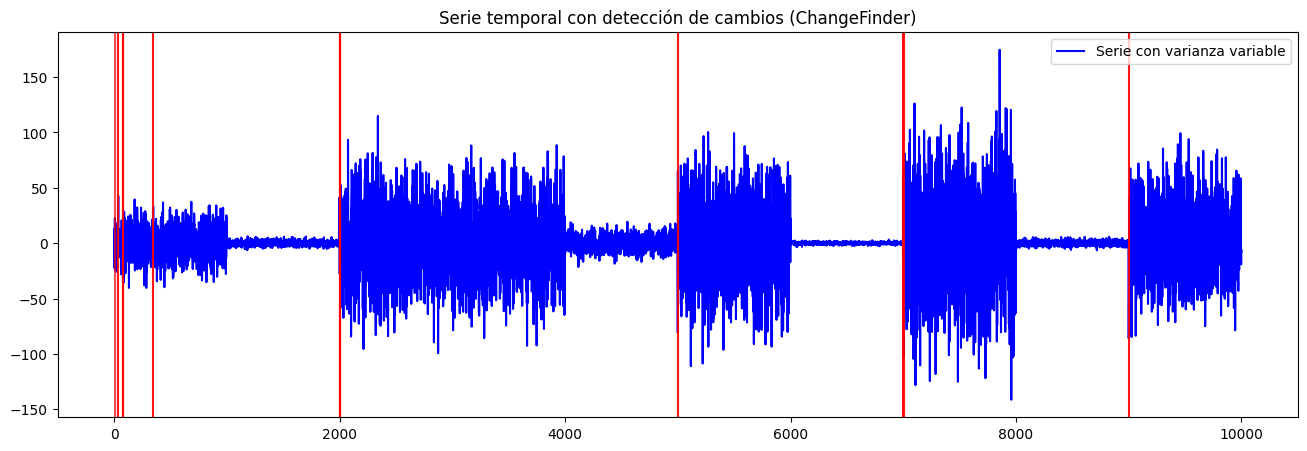

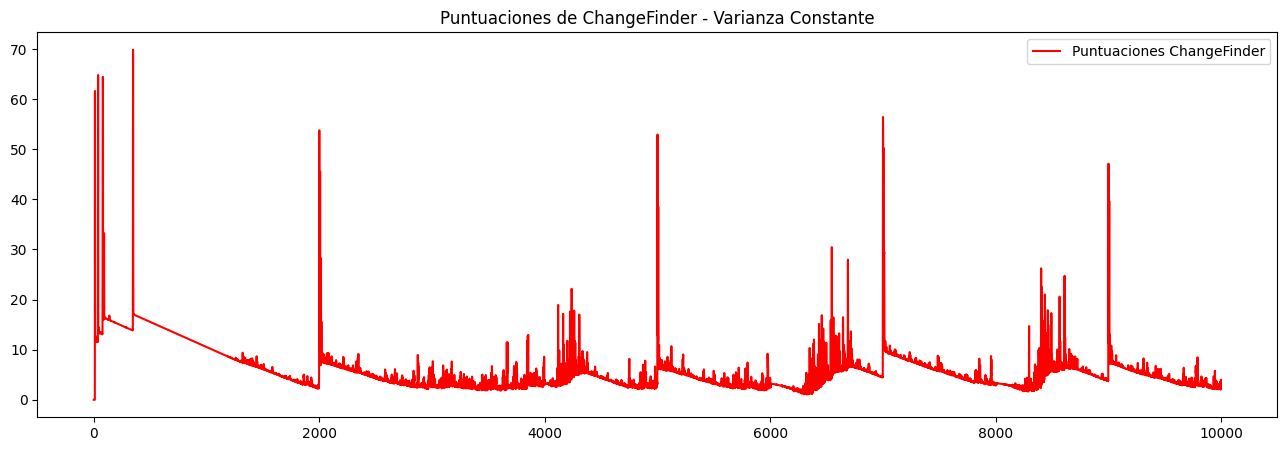

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import changefinder 

# Función para generar una serie con VARIANZA VARIABLE
def serieVarianzaVariable(num_segmentos, tamano_segmento):
    serie = np.concatenate([
        np.random.normal(0, np.random.randint(1, 50), tamano_segmento)  
        for _ in range(num_segmentos) 
    ])
    return pd.Series(serie) 

# Generar las dos series usando las funciones
serie2 = serieVarianzaVariable(10, 1000)    
serie2_np = serie2.values

# Aplicar ChangeFinder 
def findChangePoints(ts, r=0.01, order=3, smooth=5):
    cf = changefinder.ChangeFinder(r=r, order=order, smooth=smooth)
    serie2_score = [cf.update(p) for p in ts]
    
    return serie2_score

serie2_score2 = findChangePoints(serie2_np, r=0.01, order=3, smooth=5)

# Seleccionar los 20 puntos de cambio más importantes 
serie2_change_loc2 = pd.Series(serie2_score2).nlargest(20).index  # Top 20 puntos con mayor score

# Función para graficar la serie con los cambios detectados 
def plot_change_points(serie2, serie2_change_loc):
    plt.figure(figsize=(16, 5))
    plt.plot(serie2, label="Serie con varianza variable", color='blue')

    for x in serie2_change_loc:
        plt.axvline(x, lw=1.5, color='red', alpha=0.7)  # Líneas rojas en cambios detectados

    plt.title("Serie temporal con detección de cambios (ChangeFinder)")
    plt.legend(loc="upper right")
    plt.show()

# Graficar la serie y los 20 puntos de cambio más importantes 
plot_change_points(serie2, serie2_change_loc2)

# Graficar los scores de ChangeFinder
plt.figure(figsize=(16, 5))
plt.plot(serie2_score2, color='red', label="Puntuaciones ChangeFinder")
plt.title("Puntuaciones de ChangeFinder - Varianza variable")
plt.legend(loc="upper right")
plt.show()